In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
store = pd.read_csv("store.csv")
train = pd.read_csv("train(2).csv",parse_dates=[2]).sort_values(['Date'],ascending = False)
test = pd.read_csv("test(1).csv",parse_dates=[3])

In [3]:
info=pd.DataFrame(store.dtypes).rename(columns={0:'Data type'})
info['Null values (%)'] = round(((store.isna().sum())/(len(store)))*100,2)
info

,Data type,Null values (%)
Store,int64,0.00
StoreType,object,0.00
Assortment,object,0.00
CompetitionDistance,float64,0.27
CompetitionOpenSinceMonth,float64,31.75
CompetitionOpenSinceYear,float64,31.75
Promo2,int64,0.00
Promo2SinceWeek,float64,48.79
Promo2SinceYear,float64,48.79
PromoInterval,object,48.79


In [4]:
info=pd.DataFrame(train.dtypes).rename(columns={0:'Data type'})
info['Null values (%)'] = round(((train.isna().sum())/(len(train)))*100,2)
info

,Data type,Null values (%)
Store,int64,0.0
DayOfWeek,int64,0.0
Date,datetime64[ns],0.0
Sales,int64,0.0
Customers,int64,0.0
Open,int64,0.0
Promo,int64,0.0
StateHoliday,object,0.0
SchoolHoliday,int64,0.0


In [5]:
info=pd.DataFrame(test.dtypes).rename(columns={0:'Data type'})
info['Null values (%)'] = round(((test.isna().sum())/(len(test)))*100,2)
info

,Data type,Null values (%)
Store,int64,0.00
DayOfWeek,int64,0.00
Date,object,0.00
Sales,datetime64[ns],100.00
Customers,float64,100.00
Open,float64,0.03
Promo,int64,0.00
StateHoliday,object,0.00
SchoolHoliday,int64,0.00


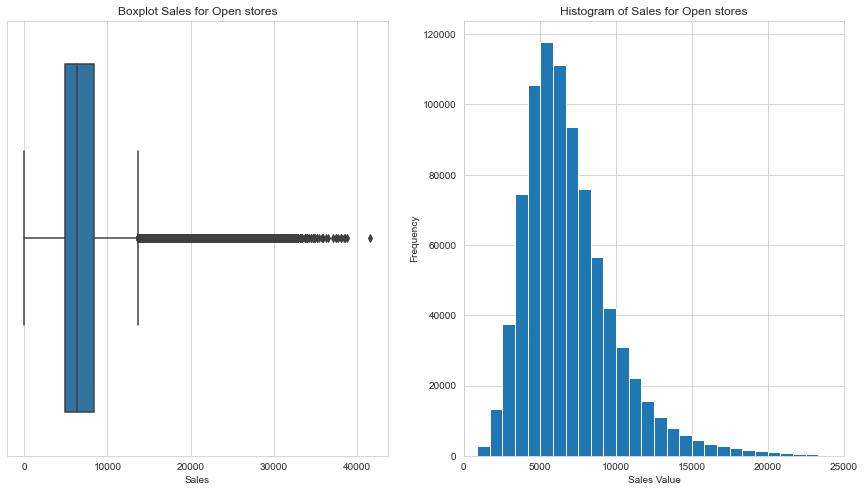

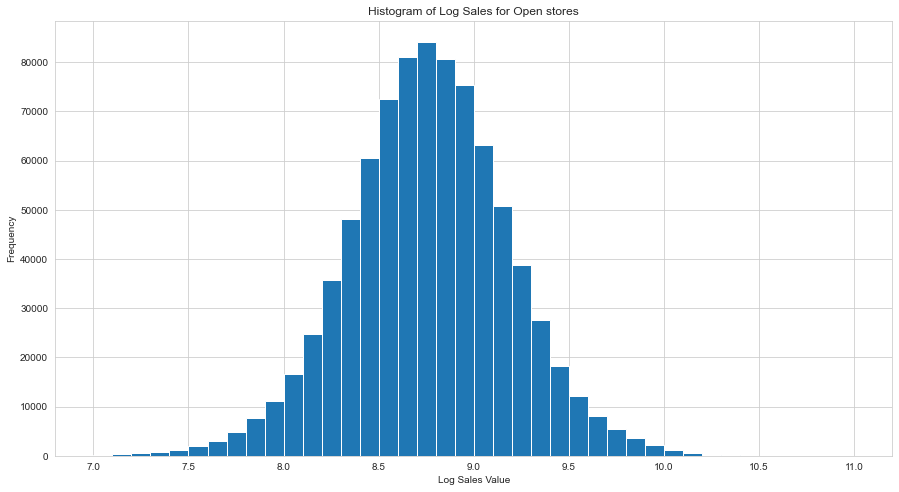

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,8))
fig, ax3 = plt.subplots(1,1,figsize=(15,8))
mask = train['Sales'] > 0
sns.boxplot(train[mask]["Sales"], orient='h', ax = ax1)
ax1.set_title("Boxplot Sales for Open stores")

train[mask]["Sales"].plot(kind='hist',bins=50,xlim=(0,25000), ax = ax2)
ax2.set_title("Histogram of Sales for Open stores")
ax2.set_xlabel('Sales Value')

ax3.hist(x = np.log(train[mask]["Sales"]), range=(7,11), bins=40)
ax3.set_title("Histogram of Log Sales for Open stores")
ax3.set_xlabel('Log Sales Value')
ax3.set_ylabel('Frequency')
plt.show()


In [7]:
print("Median Sales:", np.median(train[mask]["Sales"]))
print("="*50)
sevenfive = np.quantile(train[mask]["Sales"], 0.75)
twofive = np.quantile(train[mask]["Sales"], 0.25)
print("75th percentile Sales:", np.quantile(train[mask]["Sales"], 0.75))
print("25th percentile Sales:", np.quantile(train[mask]["Sales"], 0.25))
IQR = sevenfive - twofive
limit = sevenfive + 1.5*IQR
print('Outlier limit:', limit)

Median Sales: 6369.0
75th percentile Sales: 8360.0
25th percentile Sales: 4859.0
Outlier limit: 13611.5


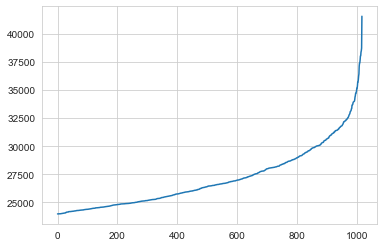

In [8]:
outliers = train[train["Sales"]>23979].sort_values('Sales')
x = np.arange(0,1018)
plt.plot(x, outliers['Sales'][:1018])

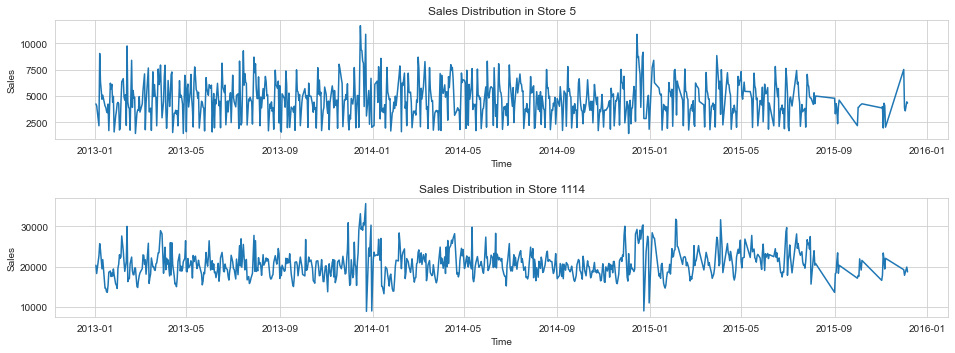

In [9]:
import matplotlib.pyplot as plt
store_1 = train.loc[(train["Store"]==5)&(train['Sales']>0) , ['Date',"Sales"]]
store_1100 = train.loc[(train["Store"]==1114)&(train['Sales']>0) , ['Date',"Sales"]]
f = plt.figure(figsize=(16,12))
plt.subplots_adjust(hspace = 0.5)
ax1 = f.add_subplot(411)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Sales Distribution in Store 5')

ax2 = f.add_subplot(412)
ax2.plot(store_1100['Date'], store_1100['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Sales Distribution in Store 1114')

plt.show()

ValueError: too many values to unpack (expected 2)

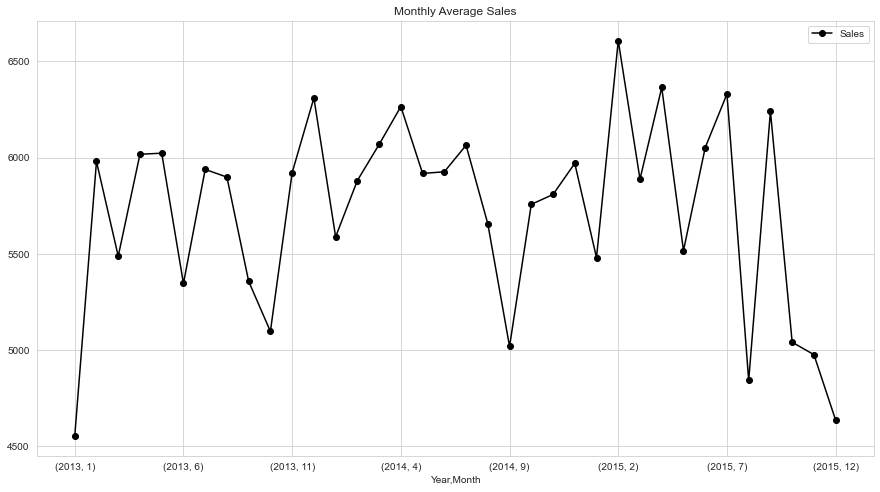

In [10]:
train['Year']  = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['WeekOfYear'] = train['Date'].dt.weekofyear

average_sales    = train.groupby(['Year', 'Month'])["Sales"].mean()
# pct_change_sales = train.groupby(['Year', 'Month'])["Sales"].sum().pct_change()

# fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
plt.figure(figsize=(15,8))

# plot average sales over time(year-month)
average_sales.plot(legend=True,marker='o',title="Monthly Average Sales", colormap='inferno')
plt.xlim(range(len(average_sales)))
plt.ylim(average_sales.index.tolist(), rotation=90)

# plot percent change for sales over time(year-month)
# ax2 = pct_change_sales.plot(legend='True',ax=axis2,marker='o',rot=90,colormap="summer",title="MoM Percent Change in Sales")

Text(0, 0.5, 'Sales')

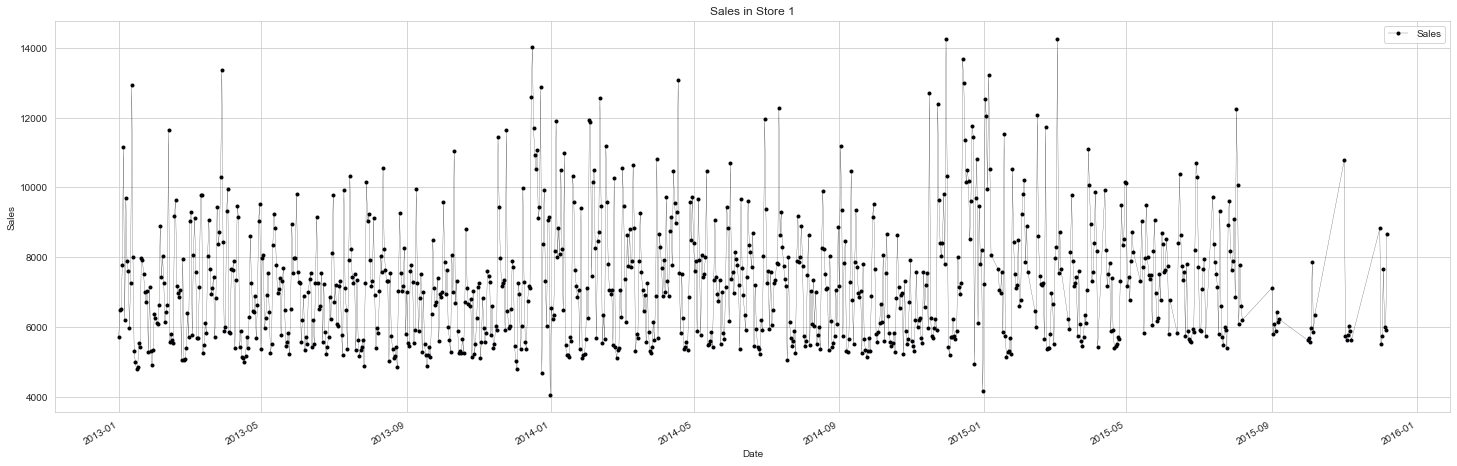

In [45]:
average_sales    = train[(train['Sales'] != 0)].groupby(['Date'])["Sales"].mean()
# pct_change_sales = train.groupby(['Year', 'Month'])["Sales"].sum().pct_change()

# fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
plt.figure(figsize=(25,8))

# plot average sales over time(year-month)
average_sales.plot(legend=True,marker='.',title="Sales in Store 1", colormap='inferno', linewidth = 0.2)
plt.ylabel('Sales')
# plt.xlim(range(len(average_sales)))
# plt.ylim(average_sales.index.tolist())

There is evidence of peaks followed by troughs in monthly average sales. Almost for every steep rise in sales there is an immediate fall. A sharp rise in sales can be seen during end of the year and smaller spikes during the summer months (June-September).

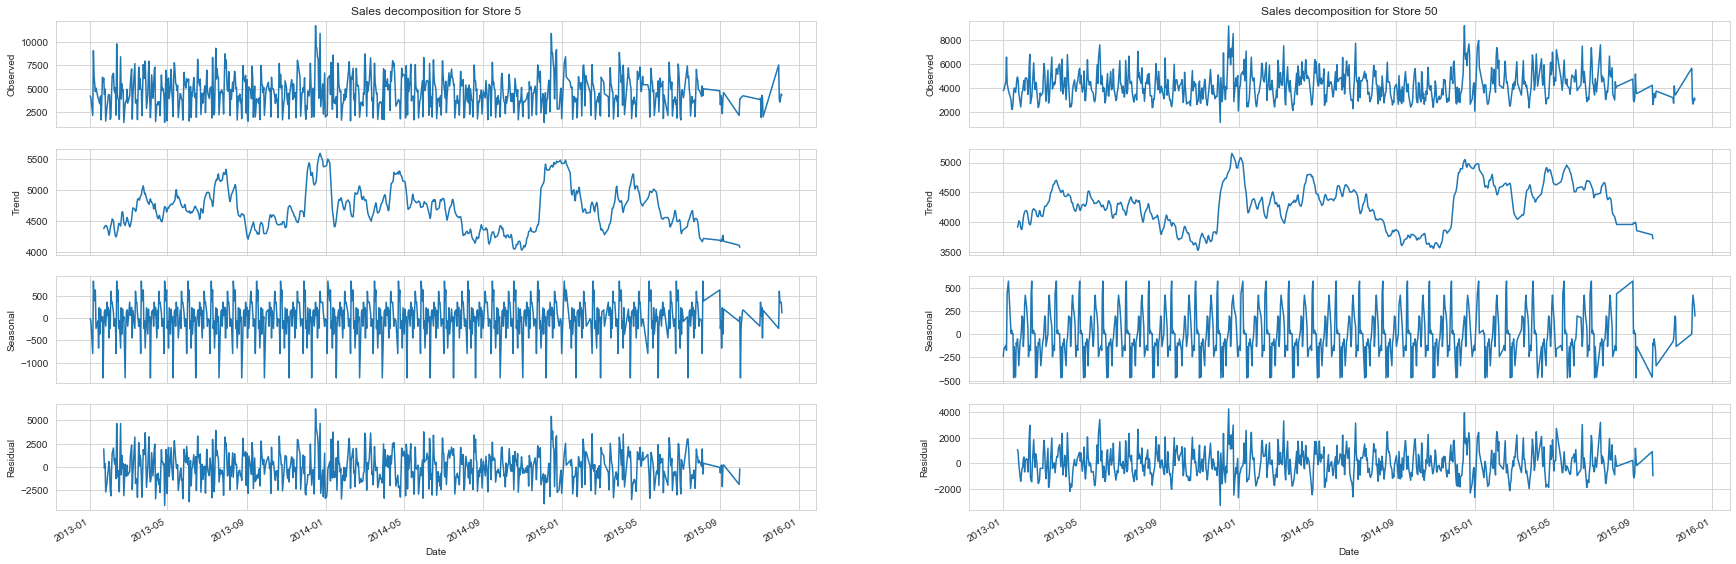

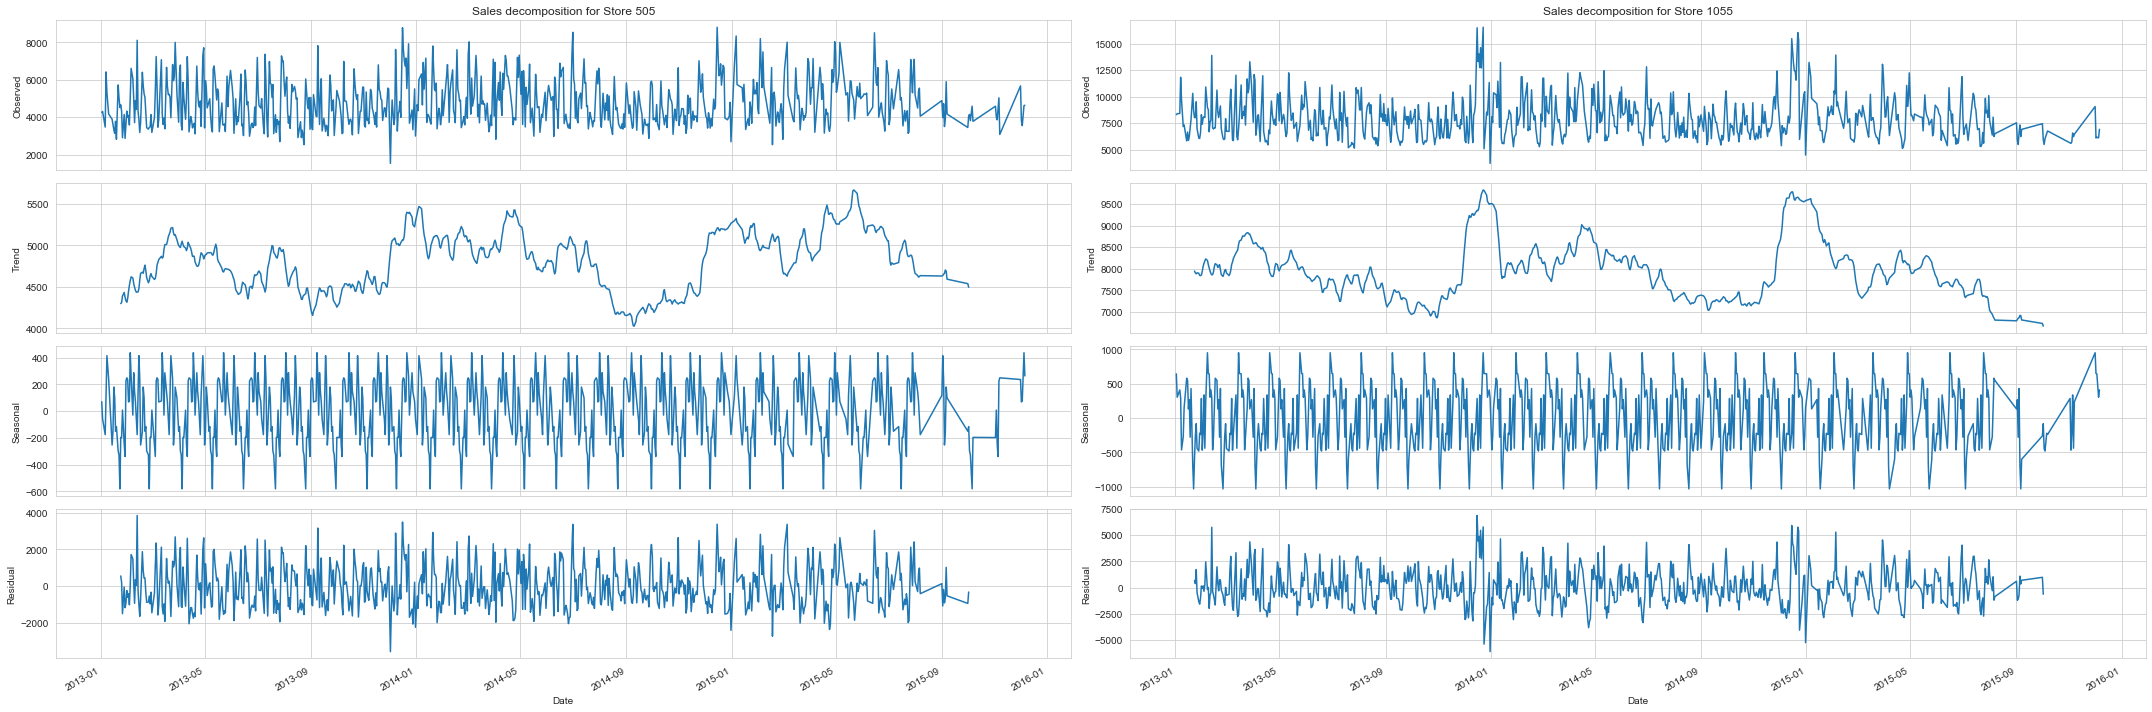

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plotseasonal(res, axes, title):
    res.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[0].set_title(title)


fig, axes1 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))
fig, axes2 = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(30,10))

store_5 = train.loc[(train["Store"]==5)&(train['Sales']>0), ['Date',"Sales"]].set_index('Date')
store_50 = train.loc[(train["Store"]==50)&(train['Sales']>0), ['Date',"Sales"]].set_index('Date')
store_505 = train.loc[(train["Store"]==505)&(train['Sales']>0), ['Date',"Sales"]].set_index('Date')
store_1055 = train.loc[(train["Store"]==1055)&(train['Sales']>0), ['Date',"Sales"]].set_index('Date')

result5 = seasonal_decompose(store_5, model='additive', period=30)
result50 = seasonal_decompose(store_50, model='additive', period=30)
result505 = seasonal_decompose(store_505, model='additive', period=30)
result1055 = seasonal_decompose(store_1055, model='additive', period=30)

plotseasonal(result5, axes1[:,0], title = 'Sales decomposition for Store 5')
plotseasonal(result50, axes1[:,1], title = 'Sales decomposition for Store 50')
plotseasonal(result505, axes2[:,0], title = 'Sales decomposition for Store 505')
plotseasonal(result1055, axes2[:,1], title = 'Sales decomposition for Store 1055')

plt.tight_layout()
plt.show()

It becomes clear from the time series decompostion plot that there is a trend in sales as we progress over the years. For all the stores analysed above there is a sharp peak in sales during December. Seasonal trends can also be clearly observed.

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

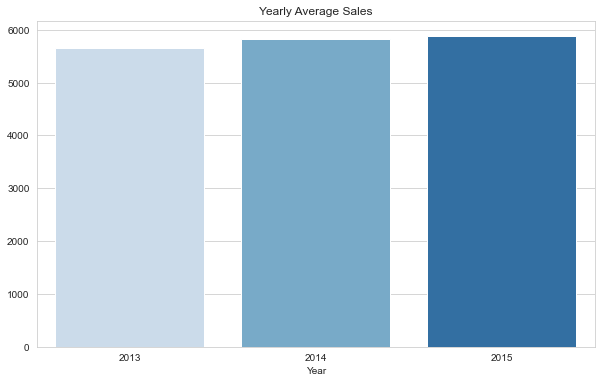

In [11]:
plt.subplots_adjust(wspace = 0.3)

plt.figure(figsize=(10,6))
df_y = train.groupby('Year')['Sales'].mean()
sns.barplot(x=df_y.index, y=df_y.values, palette='Blues')
plt.xlabel('Year')
plt.title('Yearly Average Sales')
plt.show

Text(0, 0.5, 'Sales')

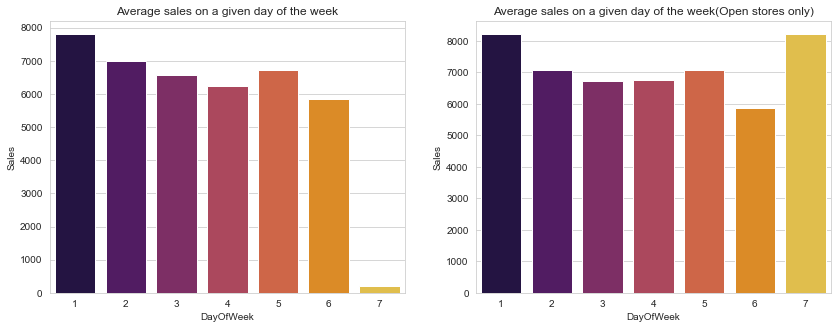

In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,5))
dw_df = train.groupby('DayOfWeek')['Sales'].mean()
dw_df_m = train[mask].groupby('DayOfWeek')['Sales'].mean()
sns.barplot(x=dw_df.index, y=dw_df.values, ax=ax1, palette='inferno')
ax1.set_title('Average sales on a given day of the week')
ax1.set_ylabel('Sales')
sns.barplot(x=dw_df_m.index, y=dw_df_m.values, ax=ax2, palette='inferno')
ax2.set_title('Average sales on a given day of the week(Open stores only)')
ax2.set_ylabel('Sales')

Most of the stores remain closed on sundays(day 7). So if we consider both opened and closed stores average Sunday sales are lowest.
But on the contrary if we consider Open stores only, Sunday and Monday (day 1) sales are among the highest.

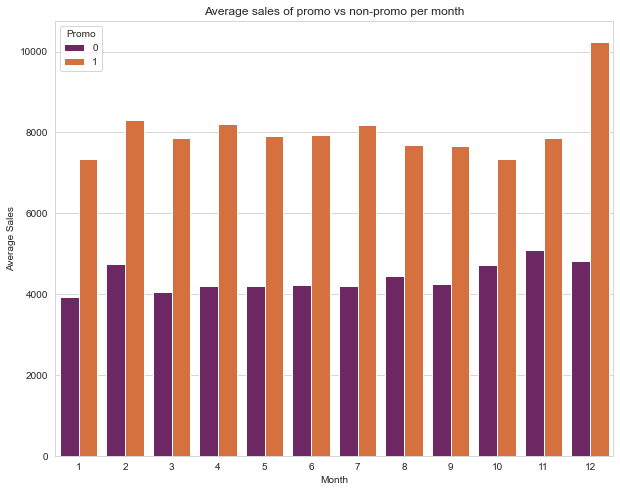

In [13]:
# fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
# sns.boxplot(x='Promo', y='Sales', data=train, ax=axis1, width=0.5, palette='Blues')
# axis1.set_xticks([0,1])
# axis1.set_xticklabels(['No Promo', 'Promo'])
# axis1.set_title('Distribution of sales with and withot promo')

plt.figure(figsize=(10,8))
promo_month = (train.groupby(['Month'])['Promo']
                     .value_counts(normalize=True)
                     .rename('Percentage of days')
                     .mul(100)
                     .reset_index()
                     .sort_values('Month'))

promo_month1 = (train.groupby(['Month', 'Promo'])['Sales']
                     .mean()
                     .rename('Average Sales')
                     .reset_index()
                     .sort_values('Month'))

sns.barplot(x='Month', y ='Average Sales', hue='Promo', data=promo_month1, palette='inferno')
plt.title('Average sales of promo vs non-promo per month')
# sns.barplot(x="Month", y="Percentage of days", hue="Promo", data=promo_month, ax = axis2, palette='Blues')
# axis2.set_title('Percentage of promo to non-promo days per month')
plt.show()

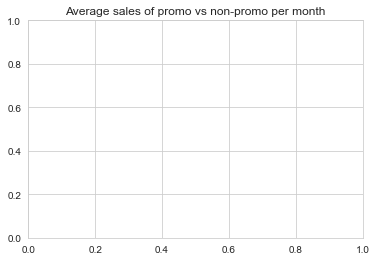

In [23]:
promo_month1 = (train.groupby(['Month', 'Promo'])['Sales']
                     .mean()
                     .rename('Average Sales')
                     .reset_index()
                     .sort_values('Month'))

sns.barplot(x='Month', y ='Average Sales', hue='Promo', data=promo_month1, ax=axis1, palette='Blues')
plt.title('Average sales of promo vs non-promo per month')

# sns.barplot(x="Month", y="Percentage of days", hue="Promo", data=promo_month, ax = axis2, palette='Blues')
# axis2.set_title('Percentage of promo to non-promo days per month')
plt.show()

In [24]:
promo_month1

,Month,Promo,Average Sales
0,1,0,3929.068707
1,1,1,7331.481850
2,2,0,4743.054120
3,2,1,8310.746639
4,3,0,4041.714926
5,3,1,7866.066206
6,4,0,4195.199593
7,4,1,8200.983867
8,5,0,4201.091737
9,5,1,7910.303613


Clearly sales is higher when there is promotions are given in a store. If we take a look a at the how the promotions are distributed over the months, we find that in any month (on an average) around 30-40% of the days (i.e. 10-12 days per month) the stores run promtional offers. However, it is higher for March, July and November and significantly lower in December. This could be a strategy to even out sales over the months. The stores might increase promotion duration when the sales go down or to clear inventory before new sales cycle begins.

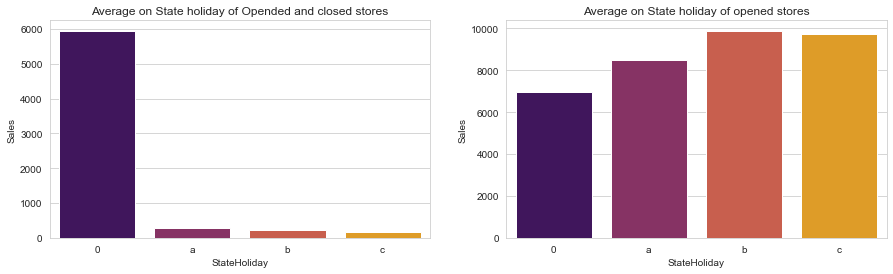

In [15]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
# fig, (axis3,axis4) = plt.subplots(1,2,figsize=(15,4))
train["StateHoliday"].loc[train["StateHoliday"] == 0] = "0"
# sth_df = train.groupby('StateHoliday')['Date'].count()
# sns.barplot(sth_df.index, sth_df.values, ax = axis1)
# axis1.set_ylabel('Frequency')
# axis1.set_title('Frequency of occurence of State holiday')


sth_df_s = train.groupby('StateHoliday')['Sales'].mean()
sns.barplot(x=sth_df_s.index, y=sth_df_s.values, ax=axis1, palette='inferno')
axis1.set_title('Average on State holiday of Opended and closed stores')
axis1.set_ylabel('Sales')

# mask = train["Sales"] > 0
# train_full_copy = train.copy()
# train_full_copy["StateHoliday"] = train[mask]["StateHoliday"].apply(lambda x:0 if x=="0" else 1)
# sns.boxplot(x='StateHoliday', y='Sales', data=train_full_copy, ax=axis3)
# axis3.set_title('Sales distribution on State holidays vs other days')

sth_df_s=train[mask].groupby('StateHoliday')['Sales'].mean()
sns.barplot(x=sth_df_s.index, y=sth_df_s.values, ax=axis2, palette='inferno')
axis2.set_ylabel('Sales')
axis2.set_title('Average on State holiday of opened stores')
plt.show()

The number of state holidays of type 'a' are most frequent while type 'c' are least frequent.
Average sales on a state holidays are significantly less than other days. Further, it is lowest on a 'c' type state holiday as per the second graph.
But this data is potentially misleading. Beacuse when we consider only the stores open during a state holidays, the median sales is higher than a normal day.
Actually we can see that on all types of state holidays the average sales is higher than other days but as some of the stores remain closed on state holidays the second graph tells a deifferent story.

EDA Promo2

In [16]:
train_full = pd.merge(train, store, on='Store')
train_full['CompetitionOpenInMonths'] = 12 * (train_full.Year - train_full.CompetitionOpenSinceYear) + \
        (train_full.Month - train_full.CompetitionOpenSinceMonth)
train_full['CompetitionOpenInMonths'] = train_full['CompetitionOpenInMonths'].apply(lambda x: x if x > 0 else 0)

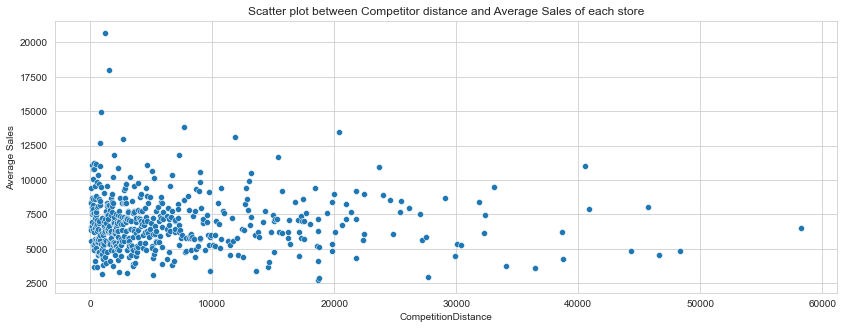

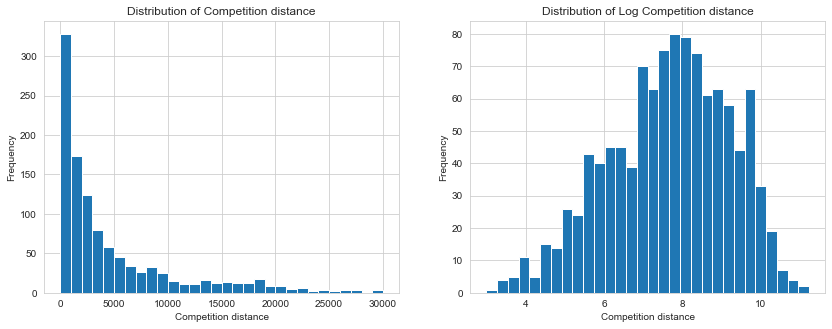

In [17]:
fig, axis1 = plt.subplots(1,1,figsize=(14,5))
fig, (axis2,axis3) = plt.subplots(1,2,figsize=(14,5))

# Plot CompetitionDistance Vs Sales
comp_df = train_full[(train_full['Sales']>0)&(~train_full['CompetitionDistance'].isna())&\
                    (train_full.CompetitionOpenInMonths>0)].groupby('CompetitionDistance')['Sales'].mean()
sns.scatterplot(x=comp_df.index,y=comp_df.values, ax = axis1)
axis1.set_ylabel('Average Sales')
axis1.set_title('Scatter plot between Competitor distance and Average Sales of each store')
axis2.hist(x = store['CompetitionDistance'].dropna(), bins = 30, range=(0,30000))
axis2.set_ylabel('Frequency')
axis2.set_xlabel('Competition distance')
axis2.set_title('Distribution of Competition distance')
axis3.hist(x = np.log(store['CompetitionDistance'].dropna()), bins = 30)
axis3.set_ylabel('Frequency')
axis3.set_xlabel('Competition distance')
axis3.set_title('Distribution of Log Competition distance')
plt.show()

NameError: name 'axis5' is not defined

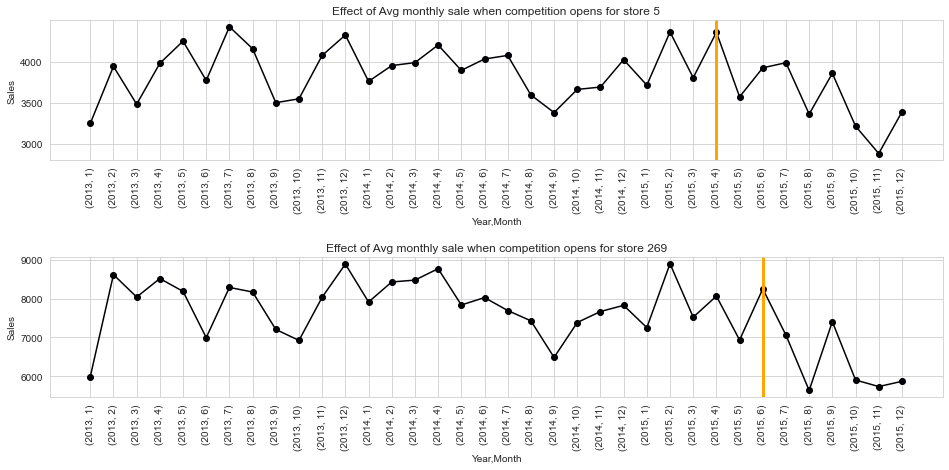

In [18]:
# What happened to the average sales of a store over time when competition started?
# Example: the average sales for store_id = 6 has dramatically decreased since the competition started

f = plt.figure(figsize=(16,20))
plt.subplots_adjust(hspace = 0.7)
store_data = train_full[train_full['Store'] == 5]
average_store_sales = store_data.groupby(['Year','Month'])['Sales'].mean()

axis1 = f.add_subplot(511)
axis1 = average_store_sales.plot(marker='o', colormap='inferno')
axis1.set_xticks(range(len(average_store_sales)))
axis1.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with year=2013 till 2015,
# So, we need to check if year>=2013 and y & m aren't NaN values.
# Get year and month when Competition started
y = train_full["CompetitionOpenSinceYear"].loc[train_full["Store"]  == 5].values[0]
m = train_full["CompetitionOpenSinceMonth"].loc[train_full["Store"] == 5].values[0]

if y>=2013 and y == y and m == m:
    axis1.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='orange')

axis1.set_title('Effect of Avg monthly sale when competition opens for store 5')
axis1.set_ylabel('Sales')

store_data = train_full[train_full['Store'] == 269]
average_store_sales = store_data.groupby(['Year','Month'])['Sales'].mean()

axis2 = f.add_subplot(512)
axis2 = average_store_sales.plot(marker='o', colormap='inferno')
axis2.set_xticks(range(len(average_store_sales)))
axis2.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

y = train_full["CompetitionOpenSinceYear"].loc[train_full["Store"]  == 269].values[0]
m = train_full["CompetitionOpenSinceMonth"].loc[train_full["Store"] == 269].values[0]

if y>=2013 and y == y and m == m:
    axis2.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='orange')

axis2.set_title('Effect of Avg monthly sale when competition opens for store 269')
axis2.set_ylabel('Sales')

# store_data = train_full[train_full['Store'] == 983]
# average_store_sales = store_data.groupby(['Year','Month'])['Sales'].mean()

# axis3 = f.add_subplot(513)
# axis3 = average_store_sales.plot(marker='o')
# axis3.set_xticks(range(len(average_store_sales)))
# axis3.set_xticklabels(average_store_sales.index.tolist(), rotation=90)
# axis3.set_title('Effect of Avg monthly sale when competition opens for store 983')
# axis3.set_ylabel('Sales')

# y = train_full["CompetitionOpenSinceYear"].loc[train_full["Store"]  == 983].values[0]
# m = train_full["CompetitionOpenSinceMonth"].loc[train_full["Store"] == 983].values[0]

# if y>=2013 and y == y and m == m:
#     axis3.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')
    
    
# store_data = train_full[train_full['Store'] == 423]
# average_store_sales = store_data.groupby(['Year','Month'])['Sales'].mean()

# axis4 = f.add_subplot(514)
# axis4 = average_store_sales.plot(marker='o')
# axis4.set_xticks(range(len(average_store_sales)))
# axis4.set_xticklabels(average_store_sales.index.tolist(), rotation=90)
# axis4.set_title('Effect of Avg monthly sale when competition opens for store 423')
# axis4.set_ylabel('Sales')

# y = train_full["CompetitionOpenSinceYear"].loc[train_full["Store"]  == 423].values[0]
# m = train_full["CompetitionOpenSinceMonth"].loc[train_full["Store"] == 423].values[0]

# if y>=2013 and y == y and m == m:
#     axis4.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')


# store_data = train_full[train_full['Store'] == 740]
# average_store_sales = store_data.groupby(['Year','Month'])['Sales'].mean()

# axis5 = f.add_subplot(515)
# axis5 = average_store_sales.plot(marker='o')
# axis5.set_xticks(range(len(average_store_sales)))
# axis5.set_xticklabels(average_store_sales.index.tolist(), rotation=90)
# axis5.set_title('Effect of Avg monthly sale when competition opens for store 740')
# axis5.set_ylabel('Sales')

y = train_full["CompetitionOpenSinceYear"].loc[train_full["Store"]  == 740].values[0]
m = train_full["CompetitionOpenSinceMonth"].loc[train_full["Store"] == 740].values[0]

if y>=2013 and y == y and m == m:
    axis5.axvline(x=((y-2013) * 12) + (m - 1), linewidth=3, color='grey')
    
plt.show()

The plots show the effect of a competitor opening shop in the neighborhood on monthly average sales.

For the first 3 stores (6,57,983) the sales have shown a downward trend after the competition opened. It is to be noted that the distance from competitor was lower for these stores.
For the next two stores (423, 740) the sales did not have much effect when the competitor opened because they were not in the vicinity of the store.

In [19]:
store[(store['CompetitionDistance'] < 500) * (store['CompetitionOpenSinceYear'] > 2013)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
29,30,a,a,40.0,2.0,2014.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
51,52,d,c,450.0,4.0,2014.0,1,39.0,2010.0,"Jan,Apr,Jul,Oct"
56,57,d,c,420.0,6.0,2014.0,0,NaN,NaN,NaN
165,166,a,c,100.0,4.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
263,264,a,a,180.0,3.0,2014.0,0,NaN,NaN,NaN
265,266,a,c,360.0,3.0,2014.0,1,9.0,2011.0,"Mar,Jun,Sept,Dec"
268,269,a,c,60.0,6.0,2015.0,0,NaN,NaN,NaN
274,275,d,a,300.0,5.0,2014.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
335,336,a,a,190.0,7.0,2014.0,0,NaN,NaN,NaN
390,391,a,a,460.0,11.0,2014.0,1,31.0,2013.0,"Feb,May,Aug,Nov"


In [21]:
store[(store['CompetitionDistance'] > 5000) * (store['CompetitionOpenSinceYear'] > 2013)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
44,45,d,a,9710.0,2.0,2014.0,0,NaN,NaN,NaN
53,54,d,c,7170.0,8.0,2014.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
83,84,a,c,11810.0,8.0,2014.0,0,NaN,NaN,NaN
102,103,d,c,5210.0,5.0,2015.0,0,NaN,NaN,NaN
137,138,a,c,25360.0,10.0,2014.0,0,NaN,NaN,NaN
188,189,d,a,5760.0,7.0,2014.0,0,NaN,NaN,NaN
224,225,d,a,10180.0,5.0,2015.0,0,NaN,NaN,NaN
248,249,d,c,18010.0,9.0,2014.0,0,NaN,NaN,NaN


In [22]:
train_full

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenInMonths
0,1,7,2015-12-07,0,0,0,0,0,0,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,87.0
1,1,5,2015-12-06,3695,422,1,0,0,0,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,87.0
2,1,2,2015-12-05,3547,438,1,0,0,0,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,87.0
3,1,7,2015-12-04,0,0,0,0,0,0,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,87.0
4,1,4,2015-12-03,3141,405,1,0,0,0,2015,...,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,381,3,2013-01-05,0,0,0,1,a,0,2013,...,a,a,1800.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov",74.0
1017205,381,1,2013-01-04,0,0,0,0,b,0,2013,...,a,a,1800.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov",74.0
1017206,381,5,2013-01-03,8305,923,1,0,0,0,2013,...,a,a,1800.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov",74.0
1017207,381,5,2013-01-02,8568,979,1,0,0,1,2013,...,a,a,1800.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov",74.0
